# Topological Braiding Circuit Simulator (Tutorial)
## with Fibonacci anyons

<hr>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$

This is a brief tutorial to implement simple circuits with a pre-built simulator of Fibonacci braiding circuits.

Quantum simulators are very important to understand the behavior of real quantum computers and test quantum algorithms. Since the topological quantum computers do not exist yet, it is convenient to work on a simulator to better understand how quantum computation would look like on a topological quantum computer. For this purpose, CQTech team have designed an open-source simulator in Python to help students and quantum computing enthusiasts to have the opportunity to program a topological quantum simulator.

The main challenging difference between the topological quantum computers and the other quantum computing platforms is the fact that the former is based on the fusion space of anyons which has different structure than the qubits. Therefore, this tutorial will help you practice how the fusion states of anyons is non-trivially split to computational states and non-computational states.

As all quantum simulators, this topological quantum simulator is limited in the number of anyons or qubits that it can simulate in a reasonable time since the fusion space of anyons grows exponentially and the computational work to build braiding matrices, store them and multiply them will be more expansive in case of large number of anyons. Therefore, the topological quantum computation simulator can be work ably up to 12 anyons. For practical purposes, it is better to work with 3 and 4 anyons per qubit as you can deduce from the previous notebooks.

*We highly encourage you to implement your quantum ideas on the topological quantum simulator and provide your feedback. You are also welcome to contribute to the simulator on [GitHub](https://github.com/Constantine-Quantum-Tech/tqsim).*


## Content

1. [Single qubit topological circuit](#100)
1. [Multi-qubit topological circuit](#200)

<hr>
<a id="100"></a>

## 1. Single Qubit Topoligical Circuit

In [3]:
from tqsim import AnyonicCircuit
import matplotlib.pyplot as plt
from IPython.display import Latex
from tqsim import cplot

In [4]:
# Intitialize your braiding circuit
circuit3 = AnyonicCircuit(nb_qudits=1, nb_anyons_per_qudit=3)
circuit4 = AnyonicCircuit(nb_qudits=1, nb_anyons_per_qudit=4)

<div class="alert alert-block alert-info"> <b>Note: </b> The qudit is a quantum state of $d$ complex components eg. $\left(\begin{array}{c}1\\ 0\\ 0\end{array}\right)$. The qubit is a quantum state of $2$ complex components eg. $\left(\begin{array}{c}1\\ 0\end{array}\right)$.</div>

As shown in code, the _AnyonicCircuit_ has two parameters:
1. _nb\_qudits_ : which is the number of qudits in the circuit.
2. _nb\_anyons\_per\_qudit_ : which is the number of anyons you intend to use for each qudit eg. typically 3 or 4.

In [5]:
# Apply clockwise braiding operations
circuit3.braid(1, 2)
circuit3.braid(2, 3)

circuit4.braid(2, 3)
circuit4.braid(3, 4)

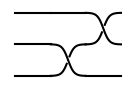

In [6]:
# Drawing the braiding circuit
circuit3.draw()

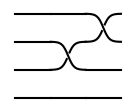

In [7]:
# Drawing the braiding circuit
circuit4.draw()

In [8]:
### Apply counter-clockwise braiding operations
circuit3.braid(2, 1)
circuit3.braid(3, 2)

circuit4.braid(3, 2)
circuit4.braid(4, 3)

Once you flip the indices of braided anyons, you get the inverse braiding operation.

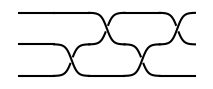

In [9]:
# Drawing the braiding circuit
circuit3.draw()

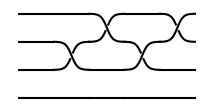

In [10]:
# Drawing the braiding circuit
circuit4.draw()

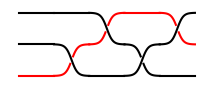

In [11]:
# Highlight given strands with specific colors
circuit3.drawer.anyons[1].color = "red"
circuit3.draw()

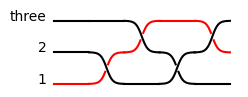

In [14]:
# Labeling the anyons
circuit3.drawer.anyons[1].label = 1  # Labeling the 1st anyon using an int
circuit3.drawer.anyons[2].label = '2'  # Labeling the 2nd anyon using a number as a string
circuit3.drawer.anyons[3].label = 'three'  # Labeling the 3rd anyon using text
circuit3.draw()

In [15]:
# Print the braiding sequences
print('3 anyons circuit:', circuit3.history())
print('4 anyons circuit:', circuit4.history())

3 anyons circuit: [(2, 1), (3, 2), (1, 2), (2, 3)]
4 anyons circuit: [(3, 2), (4, 3), (2, 3), (3, 4)]


In [16]:
# Print the braiding sequences
print('3 anyons circuit:')
Latex(circuit3.history("latex"))

3 anyons circuit:


<IPython.core.display.Latex object>

In [17]:
# Print the braiding sequences
print('4 anyons circuit:')
Latex(circuit4.history("latex"))

4 anyons circuit:


<IPython.core.display.Latex object>

In [18]:
# Get the unitary of the braiding circuit
print(circuit3.unitary())

[[ 1.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.19098301+0.58778525j  0.63600982-0.46208819j]
 [ 0.        +0.j         -0.63600982-0.46208819j  0.19098301-0.58778525j]]


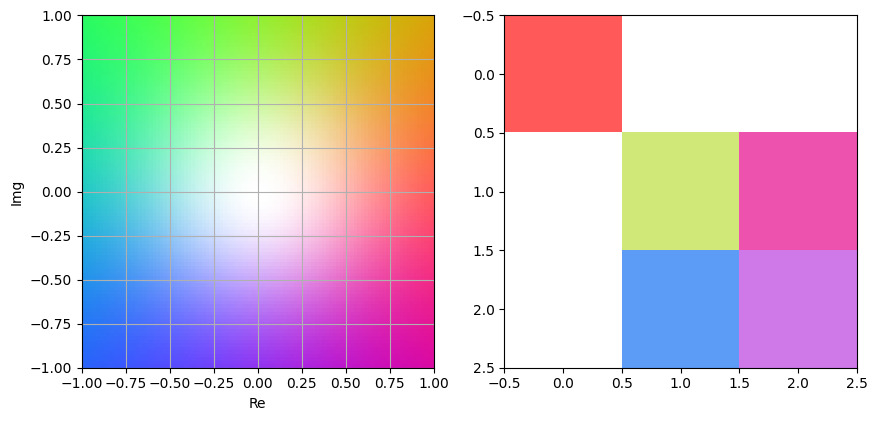

In [19]:
cplot(circuit3.unitary())

In [20]:
# Get the basis
circuit3.basis

[{'qudits': [[1, 0]], 'roots': []},
 {'qudits': [[0, 1]], 'roots': []},
 {'qudits': [[1, 1]], 'roots': []}]

The basis involves the complete set of fusion states including the non-computational states. The general form of the fusion basis is given by the following fusion diagram.



3 anyons fusion state :

        1 1 1 
        \/  / 
        i\ / 
          \    
          j\   

            
This state is represented by Python dict :

        {'qudits': [[i, j]] 'roots': []}


In [21]:
# Get the unitary of the braiding circuit
print(circuit4.unitary())

[[ 1.90983006e-01-5.87785252e-01j -6.36009825e-01+4.62088186e-01j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j]
 [ 6.36009825e-01+4.62088186e-01j  1.90983006e-01+5.87785252e-01j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   5.00000000e-01-3.63271264e-01j  5.55111512e-17+4.16333634e-17j
  -6.36009825e-01-4.62088186e-01j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   6.18033989e-01-2.77555756e-17j  5.00000000e-01+3.63271264e-01j
   1.50141553e-01+4.62088186e-01j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   1.50141553e-01-4.62088186e-01j -6.36009825e-01+4.62088186e-01j
   3.81966011e-01-5.55111512e-17j]]


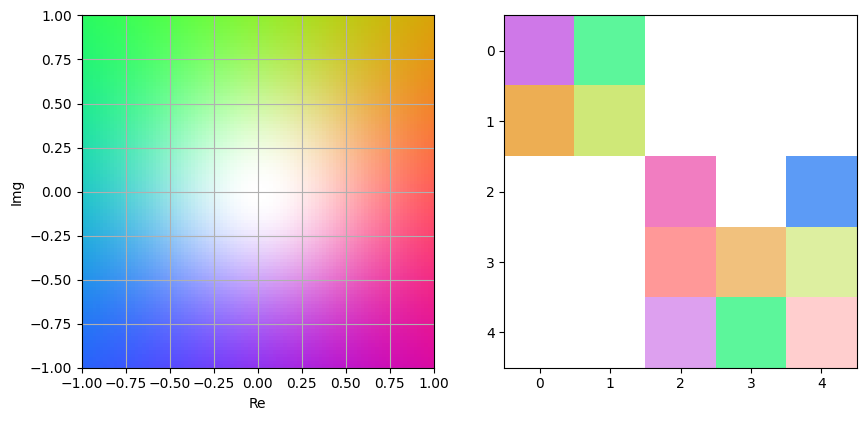

In [22]:
cplot(circuit4.unitary())

In [23]:
# Get the basis
circuit4.basis

[{'qudits': [[0, 1, 0]], 'roots': []},
 {'qudits': [[1, 1, 0]], 'roots': []},
 {'qudits': [[1, 0, 1]], 'roots': []},
 {'qudits': [[0, 1, 1]], 'roots': []},
 {'qudits': [[1, 1, 1]], 'roots': []}]


4 anyons fusion state :

        1 1 1 1
        \/  / /
        i\ / /
         j\ /   
          k\   

            
This state is represented by Python dict :

        {'qudits': [[i, j, k]] 'roots': []}



In [24]:
# Measure the circuit by fusing all 
circuit3.measure()
circuit4.measure()

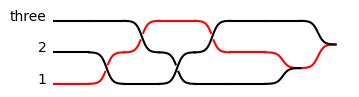

In [25]:
circuit3.draw()

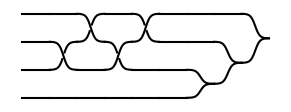

In [26]:
circuit4.draw()

In [27]:
# Get the result of measurement in given number of shots for given input state
result3 = circuit3.run(shots=1000)

In [28]:
print(result3)

{'counts': {'0': 1000}, 'memory': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0

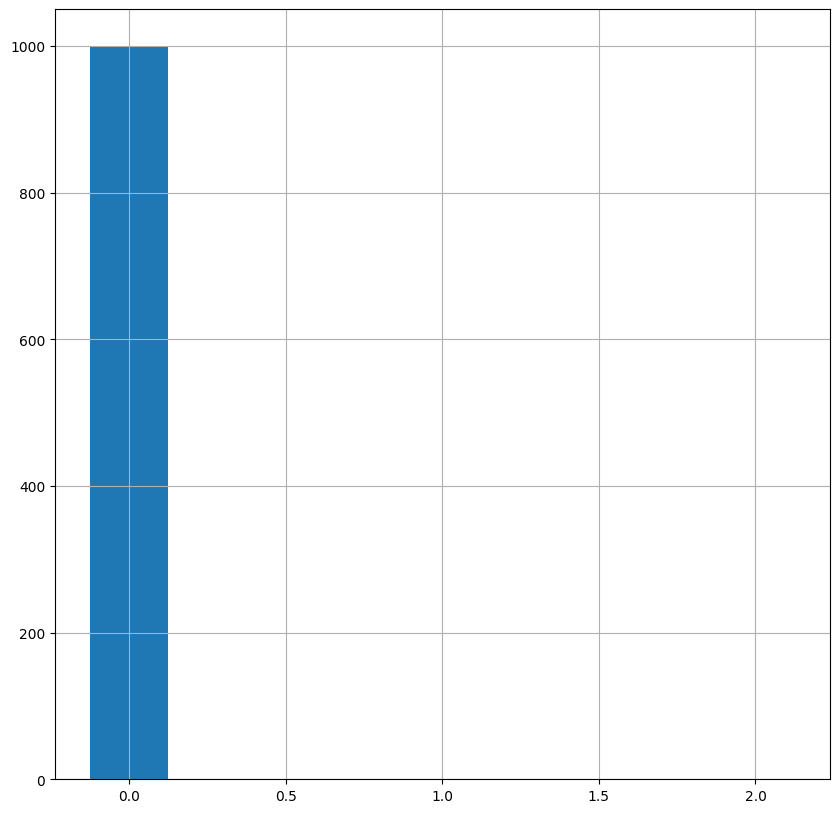

In [29]:
# Show the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result3['memory'], [0, 1, 2, 3], align='left', rwidth=0.25)
plt.grid()
plt.show()

In [30]:
# Get the result of measurement in given number of shots for given input state
result4 = circuit4.run(shots=1000)

In [31]:
print(result4)

{'counts': {'0': 354, '1': 646}, 'memory': array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0

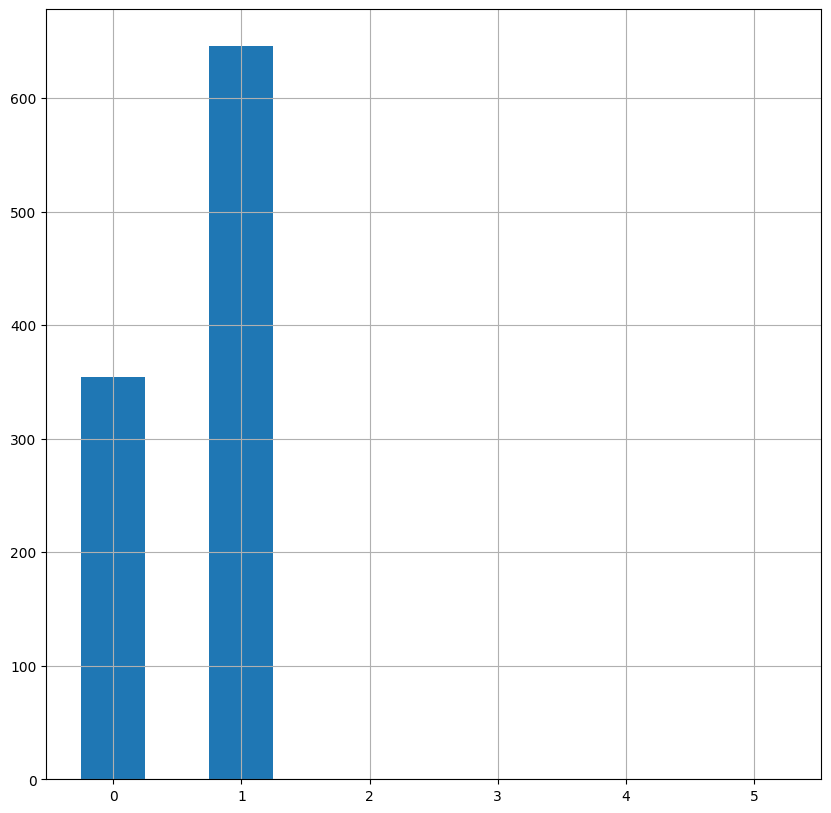

In [32]:
# Show the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result4['memory'], [0, 1, 2, 3, 4 , 5, 6], align='left', rwidth=0.5)
plt.grid()
plt.show()

<hr>
<a id="200"></a>

## 2. Multi-Qubit Topological Circuit

    Example: nb_qudits = 3, nb_anyons_per_qudit = 3
    
        1 1 1 1 1 1 1 1 1
        \/  / \/  / \/  /
        i\ /  k\ /  e\ /
          \     /     /
          j\  l/     /f
            \ /     / 
            m\     /
              \   /
               \ /
               t|
  
    This state is represented by the following Python dict:
    
        {'qudits': [[i, j], [k, l], [e, f]], 'roots': [m, t]}

In [33]:
circuit = AnyonicCircuit(nb_qudits=2, nb_anyons_per_qudit=4)

In [34]:
circuit.braid(1, 2)
circuit.braid(2, 3)
circuit.braid(3, 4)
circuit.braid(4, 5)
circuit.braid(5, 6)

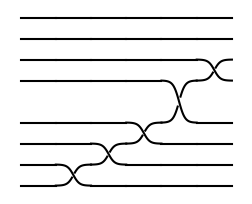

In [35]:
circuit.draw()

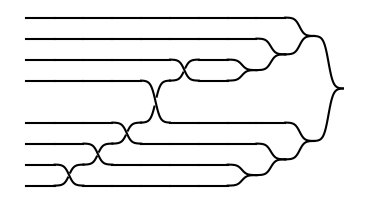

In [36]:
# Measure the fusion circuit
circuit.measure()
circuit.draw()

In [37]:
# The dimension of the basis
circuit.dim

34

In [38]:
# The unitary of the circuit
circuit.unitary()

array([[-0.30901699-0.22451399j, -0.39307569-0.2855862j ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [-0.39307569-0.2855862j ,  0.30901699+0.22451399j,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
        -0.11803399+0.36327126j, ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       ...,
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ..., -0.02786405-0.36327126j,
        -0.02786405-0.36327126j,  0.02190536+0.2855862j ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.39918694-0.05300056j,  0.50777363-0.06741776j],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j       

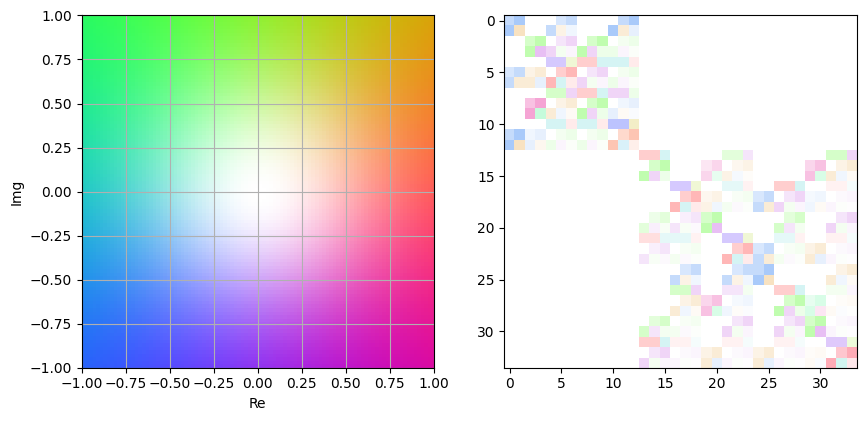

In [39]:
cplot(circuit.unitary())

In [40]:
import numpy as np
# Result of measurement
d = circuit.dim
result = circuit.run(shots=1000)

In [41]:
print(result)

{'counts': {'0': 141, '1': 237, '5': 84, '6': 146, '11': 150, '12': 242}, 'memory': array([ 6, 12, 11, 11,  0, 11,  0,  6,  1,  1, 12,  6,  6, 12,  5,  1,  6,
        6,  0,  5, 11,  1,  1, 11, 12, 12,  1,  5,  1,  1,  5,  1,  0, 12,
       11,  0,  0,  1, 12, 11,  5,  1,  0,  1, 11,  6, 12,  1,  1,  6, 12,
        1, 12,  1,  1,  0,  1,  0,  6,  6, 12,  1, 12, 11, 12, 12, 12,  1,
       11, 12,  6,  6,  1, 11, 11,  0,  0,  1, 11, 12,  0,  0, 12, 12,  5,
       12,  0, 11, 12,  6,  5,  5, 11,  0,  0, 11,  6,  0, 12,  1, 12, 12,
        1,  1,  6,  5,  1,  0,  0, 12, 12,  6,  0,  1,  1,  1, 12,  1,  5,
       12,  6,  1, 12,  0,  6,  6, 11,  1,  1,  1,  1, 11,  1, 11, 12,  6,
        5, 12,  0,  6,  0,  6,  5, 12,  1, 12, 11,  0,  5,  1,  0, 12,  1,
        5, 12,  1,  0,  5,  1,  0,  1, 12,  1,  6, 12,  6, 11,  1, 12, 11,
        1,  0,  1, 12,  6, 12, 12,  6, 12,  6, 11, 12,  1, 11,  1,  1,  0,
       12,  0, 11,  6,  6,  6,  0,  1,  5, 11, 12, 12, 11,  5,  1, 11, 11,
        0, 12,  

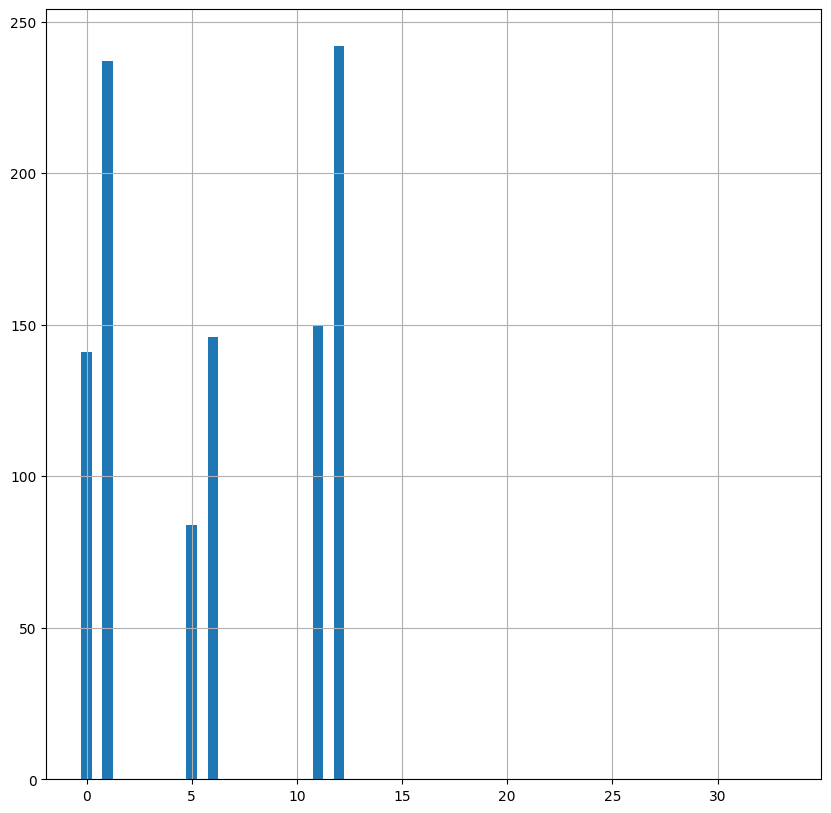

In [42]:
# Show the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result['memory'], [ii for ii in range(d+1)], align='left', rwidth=0.5)
plt.grid()
plt.show()